# Project 1: No show appointments

## Introduction

The aim of this project is to determine what factors are important for us to know in order for us to predict if a patient will show up to their scheduled appointment. 


### Import packages and dataset

Data was taken from [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
df.shape # data has 110527 rows and 14 columns

(110527, 14)

In [3]:
df.info() # Issue #1: ScheduledDay and AppointmentDay are objects, but should be DayTime data types. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.nunique() # I foresee an issue with 'Handcap' (5 variables but should only have 2). 

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [5]:
sum(df.duplicated()) # Good, there are no duplicate samples.

0

In [6]:
df.isnull().sum() # No cells with Na values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.AppointmentDay.unique() # Looking at appointments beteen 29 April 2016 and 8 June 2016. 

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [8]:
df.Handcap.unique() # Issue #2: We have values 0,1,2,3,4. Should only be 0 and 1. 

array([0, 1, 2, 3, 4])

In [9]:
df.Age.unique() # Issue #3: We have someone who is -1 years old.

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

Rename `No-show` as `Noshow`.

In [10]:
df.rename(columns={'No-show': 'Noshow'}, inplace=True)

This dataset contains information on 110 527 doctor appointments, from 62 299 patients, made between 29 April 2016 and 8 June 2016, and 14 variables associated.

Information about data set was obtained from [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments).

### 14 Variables:

`PatientId`: Unique identification number of the patient. 

`AppointmentID`: Unique identification number of the appointment. 

`Gender`: Gender of the patient, male (M) or female (F).

`ScheduledDay`: Date and time the appointment was made, before the actual appointment date.

`AppointmentDay`: Date of the actual appointment. 

`Age`: How old the patient is. 

`Neighbourhood`: Where the appointment takes place. 

`Scholarship`: True (1) or False (0). More information is available [here](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).

`Hipertension`: True (1) or False (0).

`Diabetes`: True (1) or False (0).

`Alcoholism`: True (1) or False (0).

`Handcap`: True (1) or False (0).

`SMS_received`: One or more messages sent to the patient

`Noshow`: True (Yes) or False (No). It is important to distinguish the difference between 'yes' and 'no' in this column. 'Yes' indicates the appointment was missed, 'no' indicates the patient showed up for their appointment. 

## Data wrangling

First, we must convert `ScheduledDay` and `AppointmentDay` from objects to Datetime data type. Then convert to date data type.  

In [11]:
# convert to Datetime data type

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [12]:
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date

In [13]:
df.info() # Check if we correctly converted to datetime data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  Noshow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Second, we must remove patients with ages < 0 years. 

In [14]:
df_clean = df.loc[(df["Age"] >= 0)] # need to remove all patients with ages less than 0

df_clean.shape # Check if row was dropped. 

(110526, 14)

In [15]:
df_clean.query('Age < 0') # No longer part of dataset.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow


Third, we must remove `Handcap` values that are not 0 or 1. 

In [16]:
df_clean.query('Handcap >= 2') # Need to remove these 199 rows.

df_clean = df_clean.loc[(df["Handcap"] < 2)] # Remove all rows with Handcap >/= 2 (Handcap not equal to 0 or 1)

df_clean.shape # Check if rows were dropped.

(110327, 14)

In [17]:
df_clean.query('Handcap >= 2') # No longer part of data set.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow


Fourth, we should check if there are any `AppointmentDay`values that occur prior to their `ScheduledDay`. Drop any rows that have `AppointmentDay`s that are prior to `ScheduledDay`. 

In [18]:
df_clean['WaitingDays'] = (df_clean['AppointmentDay']-df['ScheduledDay']).dt.days
df_clean['WaitingDays'] = df_clean['WaitingDays'].astype(int)

In [19]:
df_clean.drop(index = (df_clean.query('WaitingDays < 0').index), axis=0, inplace=True)

In [20]:
df_clean.query('WaitingDays < 0') # Check waiting days < 0 were dropped. 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,WaitingDays


Drop `PatientId` and `AppointmentID` columns.  

In [21]:
df_clean.drop(columns=['PatientId', 'AppointmentID'] ,inplace=True)

In [22]:
df_clean.info() # Check PatientID and AppointmentID columns were dropped.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110322 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110322 non-null  object
 1   ScheduledDay    110322 non-null  object
 2   AppointmentDay  110322 non-null  object
 3   Age             110322 non-null  int64 
 4   Neighbourhood   110322 non-null  object
 5   Scholarship     110322 non-null  int64 
 6   Hipertension    110322 non-null  int64 
 7   Diabetes        110322 non-null  int64 
 8   Alcoholism      110322 non-null  int64 
 9   Handcap         110322 non-null  int64 
 10  SMS_received    110322 non-null  int64 
 11  Noshow          110322 non-null  object
 12  WaitingDays     110322 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 11.8+ MB


## Exploratory data analysis

### Questions for exploratory data analysis

1. What proportion of appointments are missed?
2. Is there a relationship between showing up and gender?
3. Is there a relationship between showing up and having a scholarship?
4. Does the presence of hypertension have an affect on whether a patient will no show to their appointment?
5. Does the presence of diabetes have an affect on whether a patient will no-show to their appointment?
6. Does the presence of a handicap affect whether a patient will no-show to their appointment?
7. Do SMSs received affect whether a patient will no-show to an appointment?
8. What ages are present in this analysis? 

What proportion of doctors appointments are missed by patients?

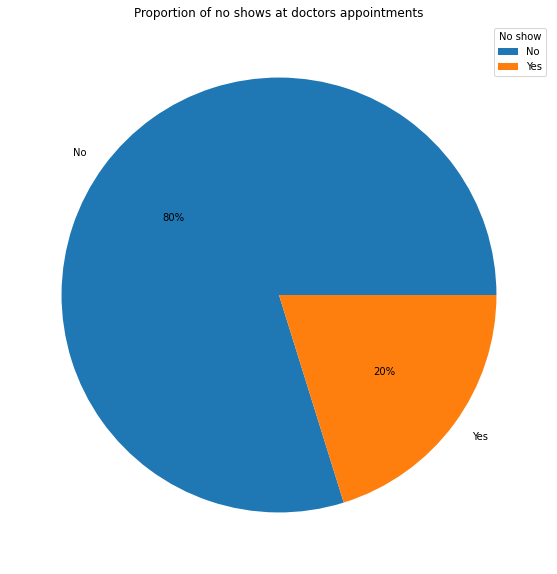

In [23]:
df_clean['Noshow'].value_counts().plot.pie(ylabel ='', figsize= (10,10), 
                                           title="Proportion of no shows at doctors appointments", autopct='%1.0f%%');
plt.legend(title= "No show")

Separate original data set into two data frames. 

In [24]:
df_yes = df_clean.query('Noshow == "Yes"')
df_no = df_clean.query('Noshow == "No"')

In [25]:
df_clean.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,WaitingDays
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


### Explore relationship between gender and showing up for appointment. 

In [68]:
gender_yes = df_yes.Gender.value_counts() # Get the total count of males and females that did not show to appointment. 
gender_totals = df_clean.groupby('Gender').count()['Noshow'] # Get the total number of males and females in the data set. 

gender_yes_prop = gender_yes/gender_totals # Get the proportion of each gender that did not show to appointment. 
gender_yes_prop

F    0.203062
M    0.199715
dtype: float64

In [113]:
# create a user-defined function for creating barcharts 

def barchart(x, title, xlabel, ylabel):
    x.plot(kind = 'bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt.show()

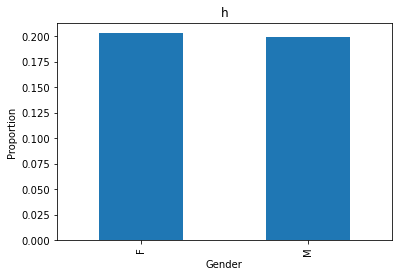

In [114]:
barchart(gender_yes_prop, 'Proportion of males and females not showing at doctors appointments', 'Gender', 'Proportion');

### Explore relationship between scholarship and not showing up for appointment

In [28]:
scholarship_yes = df_yes.Scholarship.value_counts()
scholarship_totals = df_clean.groupby('Scholarship').count()['Noshow']

scholarship_yes_prop = scholarship_yes/scholarship_totals # Get the proportion 
scholarship_yes_prop

0    0.197992
1    0.237665
dtype: float64

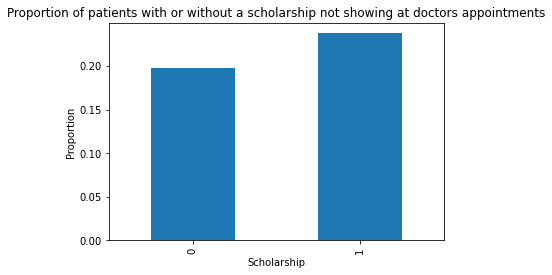

In [116]:
barchart(scholarship_yes_prop, 'Proportion of patients with or without a scholarship not showing at doctors appointments', 'Scholarship', 'Proportion')

There is a relationship between scholarship and no show. Patients with a scholarship are more likely to not show to doctors appointments. 

### Explore relationship between hypertension and showing up for appointment. 

In [30]:
hipertension_yes = df_yes.Hipertension.value_counts()
hipertension_totals = df_clean.groupby('Hipertension').count()['Noshow']

hipertension_yes_prop = hipertension_yes/hipertension_totals # Get the proportion of each gender that did not show to appointment. 
hipertension_yes_prop

0    0.209072
1    0.172592
dtype: float64

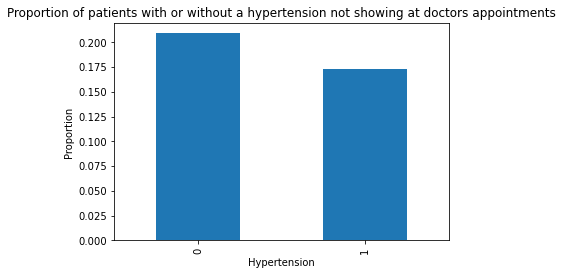

In [117]:
barchart(hipertension_yes_prop, 'Proportion of patients with or without a hypertension not showing at doctors appointments', 'Hypertension', 'Proportion')

There is a relationship between hypertension and noshow. Patients without hypertension are more likely to not show at doctors appointments. 

### Explore relationship between diabetes and not showing to appointment. 

In [32]:
diabetes_yes = df_yes.Diabetes.value_counts()
diabetes_totals = df_clean.groupby('Diabetes').count()['Noshow']

diabetes_yes_prop = diabetes_yes/diabetes_totals # Get the proportion 
diabetes_yes_prop

0    0.203579
1    0.180000
dtype: float64

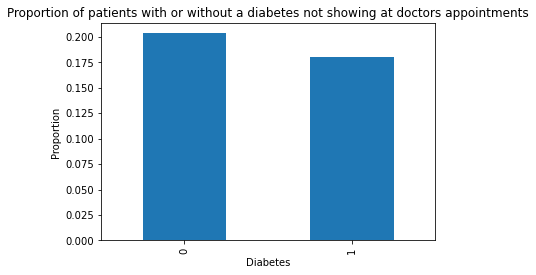

In [118]:
barchart(diabetes_yes_prop, 'Proportion of patients with or without a diabetes not showing at doctors appointments', 'Diabetes', 'Proportion')

 There is a relationship between diabetes and noshow. Patients without diabetes are much more likely to not show at doctors appointments.

### Explore relationship betweeen alcoholism and not showing to appointment. 

In [34]:
alcoholism_yes = df_yes.Alcoholism.value_counts()
alcoholism_totals = df_clean.groupby('Alcoholism').count()['Noshow']

alcoholism_yes_prop = alcoholism_yes/alcoholism_totals # Get the proportion 
alcoholism_yes_prop

0    0.201907
1    0.201372
dtype: float64

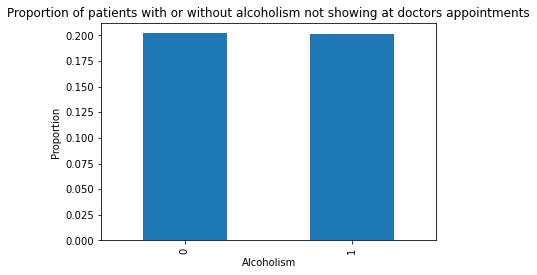

In [119]:
barchart(alcoholism_yes_prop, 'Proportion of patients with or without alcoholism not showing at doctors appointments', 'Alcoholism', 'Proportion')

There is no relationship between alcoholism and no show. Patients with alcholism are not more likely to miss doctors appointments than patients with alcoholism. 

### Explore relationship between handicap and not showing to appointment. 

In [36]:
handcap_yes = df_yes.Handcap.value_counts()
handcap_totals = df_clean.groupby('Handcap').count()['Noshow']

handcap_yes_prop = handcap_yes/handcap_totals # Get the proportion 
handcap_yes_prop

0    0.202333
1    0.178431
dtype: float64

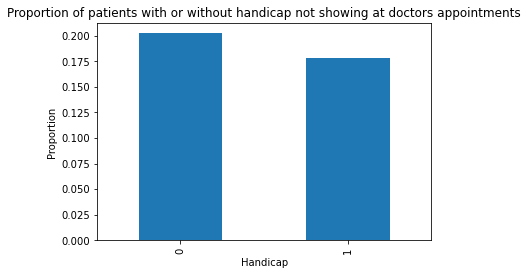

In [120]:
barchart(handcap_yes_prop, 'Proportion of patients with or without handicap not showing at doctors appointments', 'Handicap', 'Proportion')

Patients without handicap are more likely to miss appointment. 

### Explore relationship between SMS received and not showing to appointments. 

In [38]:
SMS_received_yes = df_yes.SMS_received.value_counts()
SMS_received_totals = df_clean.groupby('SMS_received').count()['Noshow']

SMS_received_yes_prop = SMS_received_yes/SMS_received_totals # Get the proportion 
SMS_received_yes_prop

0    0.166891
1    0.275857
dtype: float64

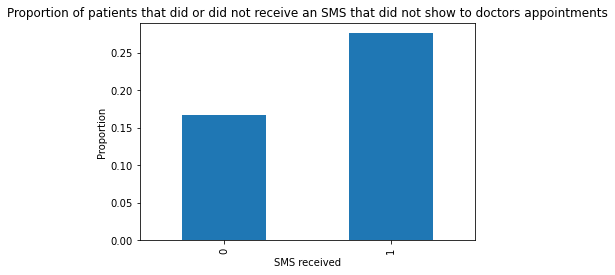

In [121]:
barchart(SMS_received_yes_prop, 'Proportion of patients that did or did not receive an SMS that did not show to doctors appointments', 'SMS received', 'Proportion')

Patients that received SMS are more likely to miss doctors appointment than patients that did not receive SMS. 

### Proportion of patients not showing up by waiting period

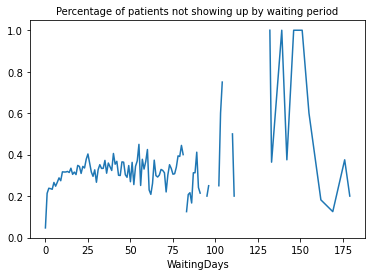

In [40]:
prop_ = df_yes.groupby(['WaitingDays']).size()/df_clean.groupby(['WaitingDays']).size()
ratio.plot()
plt.title('Proportion of patients not showing up by waiting period', size='10')
plt.show()

As time between scheduled day and appointment day increases, the proportion of patients not showing to appointment increases. This relationship is not linear. 

## Conclusions

Looking at the data we found that...
- 20% of patients did not show up for their doctors appointments. 

We then explored some possible relationships between not showing and other variables such as gender, diseases, handicaps etc.  

We found that:
- There is no significant relationship between showing up and gender. 
- Patients with a scholarship are more likely to not show to doctors appointments than patients with scholarships. 
- Patients without hypertension are more likely to not show at doctors appointments than patients with hypertension. 
- Patients without diabetes are much more likely to not show at doctors appointments.
- Patients without alcoholism are not more likely to not show doctors appointments than patients with alcoholism.
- Patients without handicap are more likely to miss appointment than patients with handicaps. 
- Patients that received an SMS were less likely to show to their appointment than those that did not receive an SMS.
- Patients that had a longer waiting period between booking their appointment (ScheduledDay) and their appointment (AppointmentDay) were more likely to not show to their appointment.

The data had the following limitations:
- The data analysed here is boolean or categorical, which makes it difficult to find relationships or trends between variables.
- Rows with Handicap values >1 were removed hence data was lost that may have altered the outcome of analyses. 
- Rows with appointment days that occur prior to scheduled days were removed, hence data was lost that may have altered the outcome of the analyses. 
- There is no information provided on whether the patient missed their appointment, or rescheduled it.
- There is no information on the reasons patients missed their appointment. 
- The data was collected over a period of 3 months, it would be preferable if it was collected over a whole year or more. This would allow us to see if there are trends in which months or which time of month patients are more likely to miss appointments. 